In [16]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")
pd.set_option('float_format', '{:f}'.format)

dfMA = pd.read_csv('max_activity.csv') #MA = max_activity
dfMM = pd.read_csv('max_member.csv') #MA = max_member
dfPT = pd.read_csv('policy_table.csv') #MA = policy_table

dfMA.columns = ['id', 'created-date', 'type', 'category', 'activity', 'name', 'customer-id', 'id-hash']
dfMM.columns = ['member-type', 'registration', 'gained-point', 'spent-point', 'current-point', 'last-login', 'language', 'gender', 'dob', 'premium-paid', 'optoutstatus', 'status', 'customer-id', 'id_hash']
dfPT.columns = ['customer-id', 'issue-date', 'end-date', 'termination-date', 'account-status', 'product-category', 'product-group', 'policy-hash']

## Display top table of 3 in order: activity, member & policy

In [19]:
display(dfMA.head())
display(dfMM.head())
display(dfPT.head())

#display(dfMA.info())
#display(dfMM.info())
#display(dfPT.info())

,id,created-date,type,category,activity,name,customer-id,id-hash
0,13253737,2021-11-18 18:19:49,MemberActivity,MemberActivity,Login,Login,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
1,247365,2021-12-09 11:17:40,Event,Wealth,RegisterLuckyDraws,FWD MAX brings you annual premium lucky draw!,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
2,14150697,2021-12-09 11:16:18,MemberActivity,MemberActivity,Login,Login,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
3,13154387,2021-11-07 21:34:18,MemberActivity,MemberActivity,Login,Login,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
4,204495,2021-11-16 15:43:43,Event,Music & Art,RegisterLuckyDraws,“FWD Presents: Jason Chan Fight For _____ Live...,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...


,member-type,registration,gained-point,spent-point,current-point,last-login,language,gender,dob,premium-paid,optoutstatus,status,customer-id,id_hash
0,Life Customer,Tied Agency,3500.000000,0.000000,0.000000,NaN,en,M,1984,83721.220000,IN,PreRegistered,e8d58359cc7e7e295143e1a3413a41c2c73758c5591d2c...,68755159f15d0a002d16528e1cbeecdb4d4ebdb0841d51...
1,Life Customer,Brokers,4838.000000,1000.000000,1338.000000,2022-09-01 08:32:19.000000,en,M,1962,138207.430000,IN,Active,07a92897fa1c26d8a27d7c5c3ad6e94f78c9eb5dfeb8bb...,309ee210d7a4fb8e15b0e687b0f3ec3b4bfa3337d6bc12...
2,Life Customer,Tied Agency,3500.000000,0.000000,0.000000,NaN,en,M,1993,31295.000000,OUT,PreRegistered,f644e812232df5d402e6bf7516d6b5f46a190ce5592efa...,4bb756bddde414e7a09c323b91f5b675fdbdb86b6786ce...
3,GI Customer,NaN,3500.000000,0.000000,0.000000,NaN,zh-HK,M,1949,0.000000,IN,PreRegistered,aa16afe69503cebdd373ed61ccadee5a3bc4b025418b92...,8356810a99375e128945a45df2f75ed4aac01371860955...
4,GI Customer,NaN,3500.000000,0.000000,0.000000,NaN,en,F,1975,0.000000,OUT,PreRegistered,83f02429730435461db05a53c4496ec44e3e372176aba4...,2002dce1b495d68c67af97908c3d8f50f4fd387f79b134...


,customer-id,issue-date,end-date,termination-date,account-status,product-category,product-group,policy-hash
0,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1986-01-01,NaN,1989-12-01,Surrendered,Universal Life,Life,e40beb0ecb5fcc16d68c3dba82584828427dc22e2558fc...
1,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1987-01-01,NaN,2002-06-19,Surrendered,Whole Life,Life,add41954cb1b82a7558394d0d9a5ba993a08274330475c...
2,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1987-01-01,NaN,1990-02-19,Surrendered,Universal Life,Life,65bc2f1ca61515d790e2b9a02e76e40c0f0da97e5f685e...
3,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1988-01-25,NaN,1990-02-18,Lapsed,Whole Life,Life,e15c976e008bd4f3a50cc50f3c46b986faf7290a3ccd77...
4,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1988-01-01,NaN,1998-05-11,Surrendered,Universal Life,Life,0241626f9d7405e529b2982836e17554c882553bffceb4...


# Activity Data
'id', 'created-date', 'type', 'category', 'activity', 'name', 'customer-id', 'id-hash'

In [27]:
display(len(dfMA))   #it has 976528 ids
display(len(dfMA['id'].drop_duplicates())) #it has 974454 unique ids

976528

974454

In [31]:
display(dfMA['type'].value_counts())
display(dfMA['category'].value_counts())
display(dfMA['activity'].value_counts())

Game              620391
MemberActivity    206098
Article            87556
Redemption         23311
Event              20379
Moment             18632
MGM                  161
Name: type, dtype: int64

MemberActivity        206098
Food & Wine            42393
Sport & Action         33476
Music & Art            22189
Health                 17252
Just For You           12980
Wealth                  7139
Travel & Adventure      6555
Lifestyle               6269
Happy Wednesday         1348
Merchant Offers          277
MGM                      161
Name: category, dtype: int64

FinishGame                             620391
Login                                  206098
MemberRatedContent                      57258
MemberSharedArticle                     30316
Redemption                              23311
RegisterLuckyDraws                      20361
MemberLikedContent                      18632
ReferredMemberCompletedRegistration       161
Name: activity, dtype: int64

## Activity's type data

<AxesSubplot:ylabel='type'>

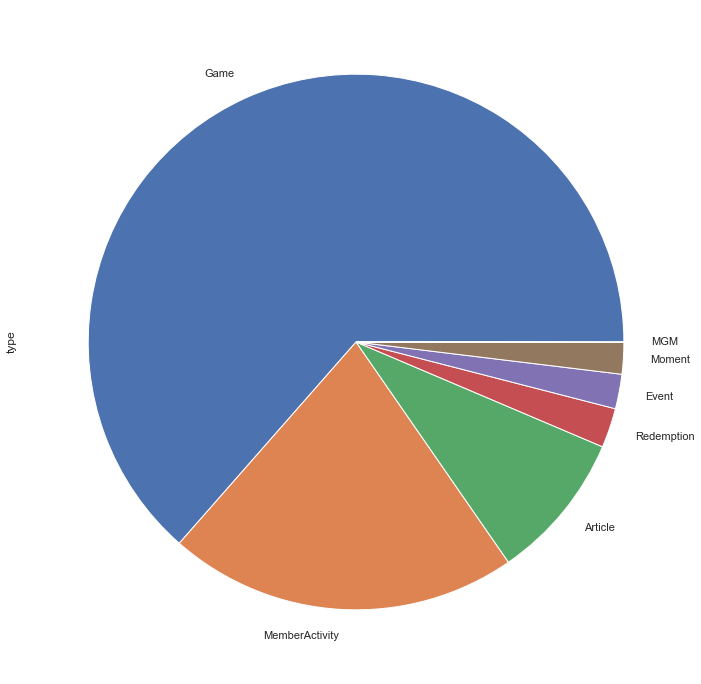

In [50]:
dfMA['type'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

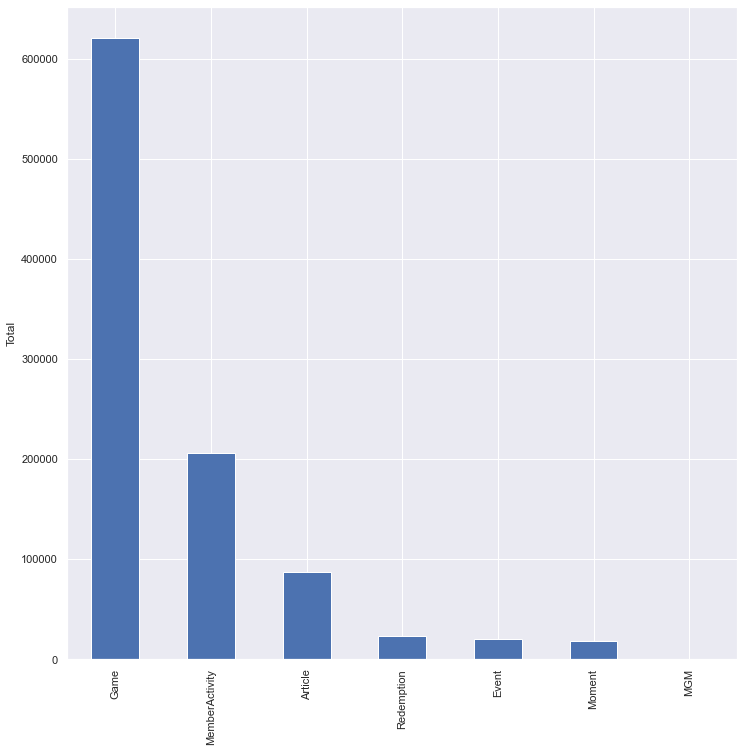

In [62]:
ax = dfMA['type'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Activity's Category

<AxesSubplot:ylabel='category'>

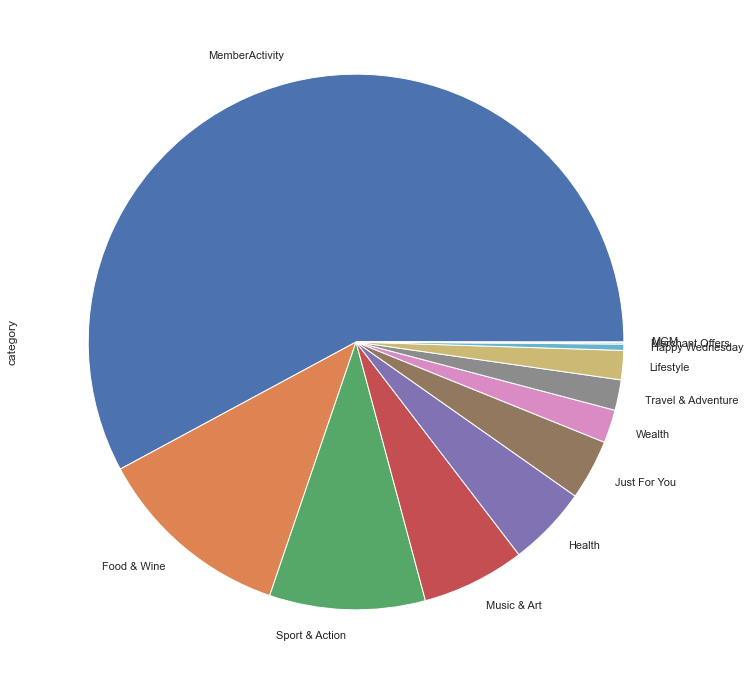

In [49]:
dfMA['category'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

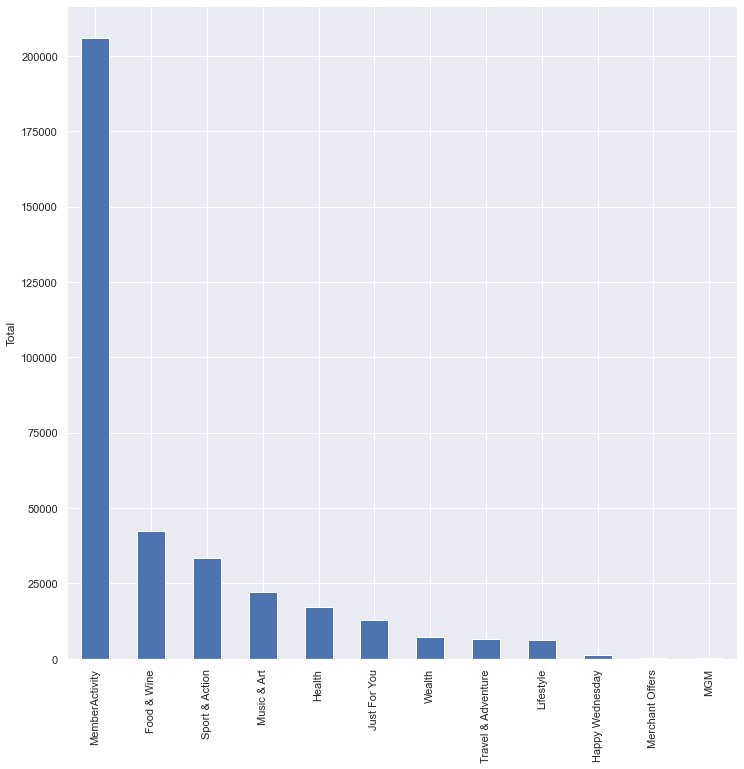

In [61]:
ax = dfMA['category'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Activity's activity

<AxesSubplot:ylabel='activity'>

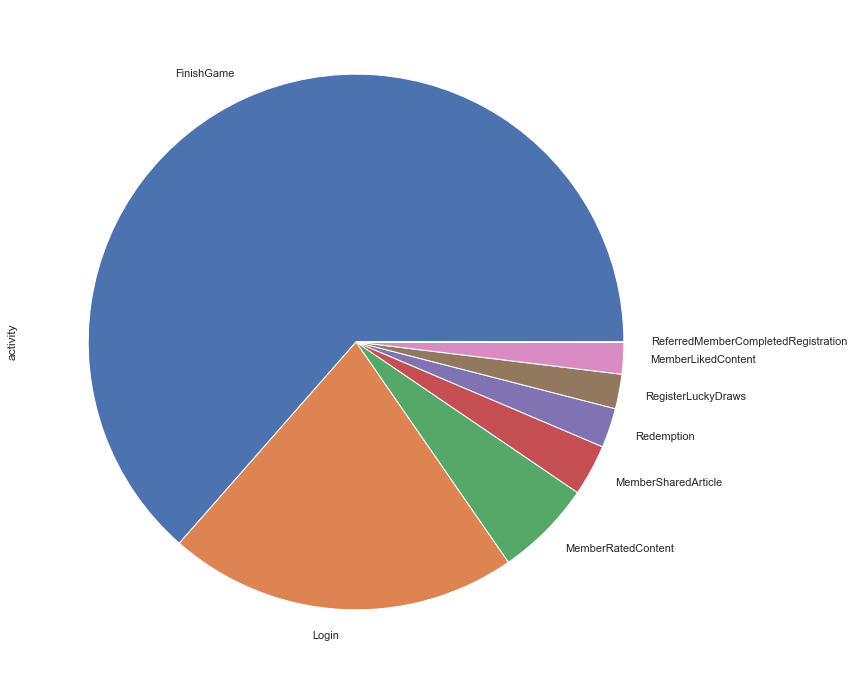

In [52]:
dfMA['activity'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

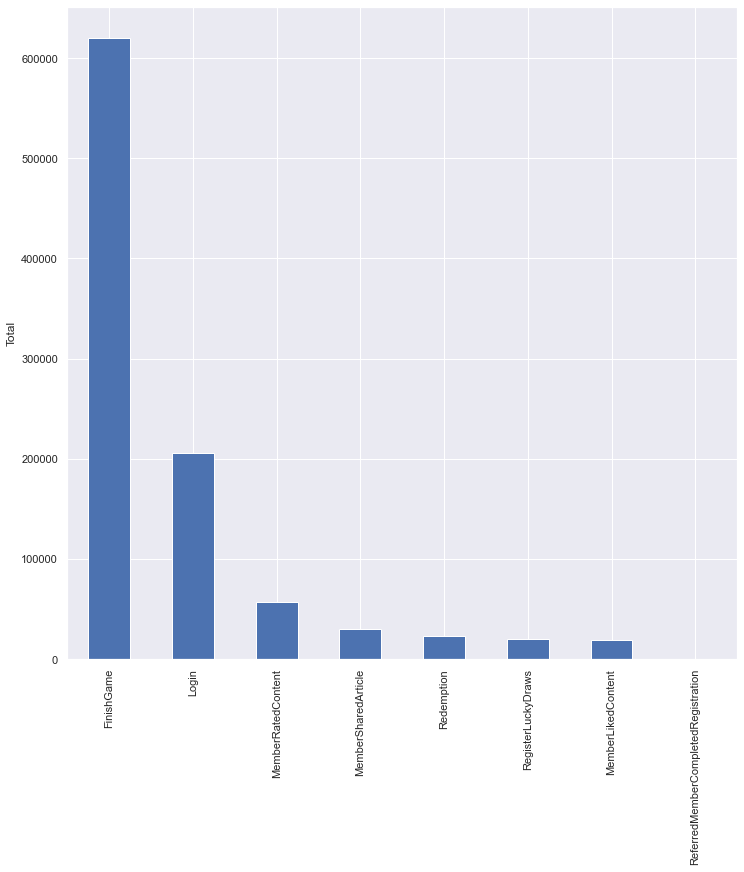

In [60]:
ax = dfMA['activity'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

# Member Data
'member-type', 'registration', 'gained-point', 'spent-point', 'current-point', 'last-login', 'language', 'gender', 'dob', 'premium-paid', 'optoutstatus', 'status', 'customer-id', 'id_hash'

In [64]:
display(len(dfMM))   #it has 331518 ids
display(len(dfMM['customer-id'].drop_duplicates())) #it has 323985 unique ids

331518

323985

In [65]:
display(dfMM['member-type'].value_counts()) # has 2 types
display(dfMM['registration'].value_counts()) # has 9 differents
display(dfMM['language'].value_counts()) # has 2 languages
display(dfMM['gender'].value_counts()) # F= female, M = Male, U = ??, C = ??
display(dfMM['status'].value_counts()) # 8 status types

Life Customer    251946
GI Customer       79572
Name: member-type, dtype: int64

Tied Agency                 207086
Brokers                      25243
Bancassurance                17701
Alternative Distribution      8034
Direct to Customers           6695
DMTM-Own Base                 4074
DMTM-Partners                 1690
DMTM-CDC                      1629
DMTM-Hong Leong                149
Name: registration, dtype: int64

zh-HK    170519
en       153392
Name: language, dtype: int64

F    170738
M    140345
U     19246
C         2
Name: gender, dtype: int64

PreRegistered               212900
Active                       75035
Zombie Account               28330
Closed By Authentication      7404
N                             6996
Closed                         218
Pending Activation              13
PreRegister Fail                11
Name: status, dtype: int64

## Member types

<AxesSubplot:ylabel='member-type'>

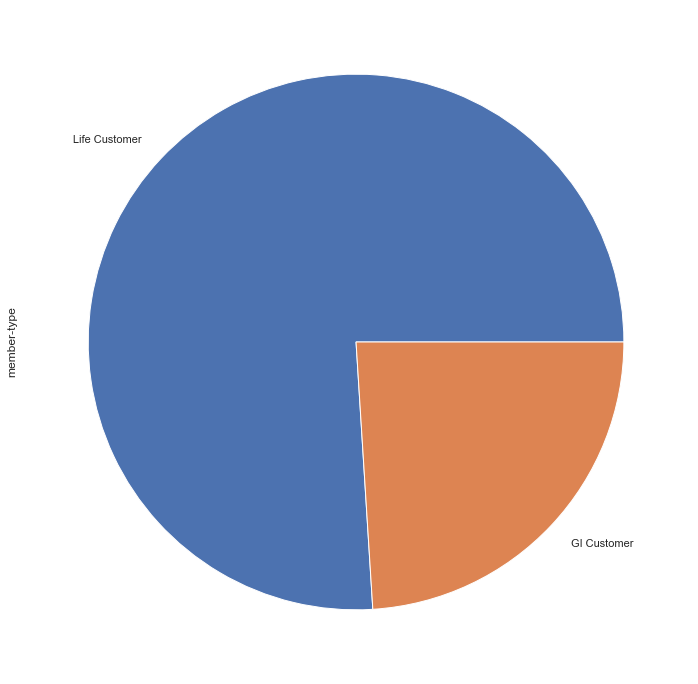

In [67]:
dfMM['member-type'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

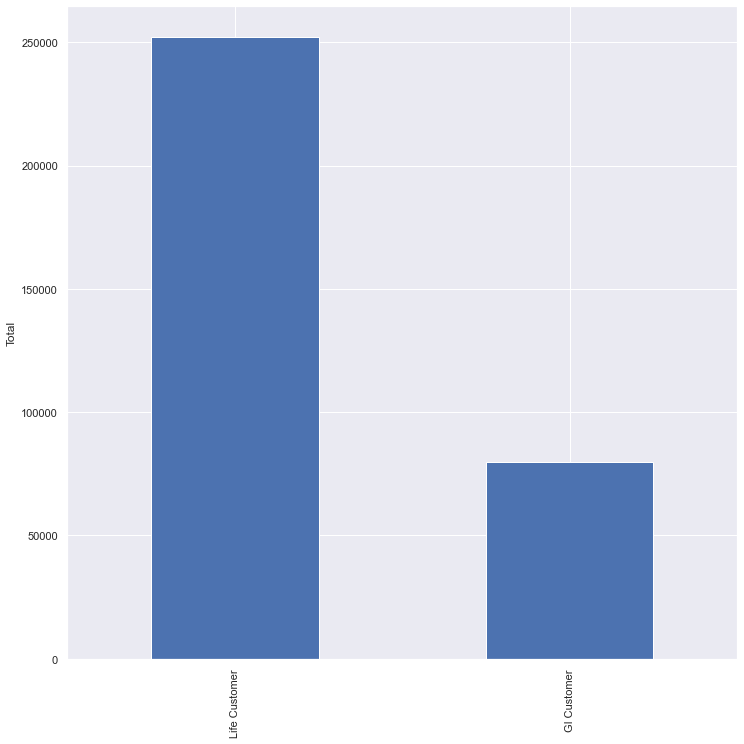

In [68]:
ax = dfMM['member-type'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## registration

In [ ]:
dfMM['registration'].value_counts().plot(kind='pie', figsize=(12, 24))

In [ ]:
ax = dfMM['registration'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## language

In [ ]:
dfMM['language'].value_counts().plot(kind='pie', figsize=(12, 24))

In [ ]:
ax = dfMM['language'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## gender

In [ ]:
dfMM['gender'].value_counts().plot(kind='pie', figsize=(12, 24))

In [ ]:
ax = dfMM['gender'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## status

In [ ]:
dfMM['status'].value_counts().plot(kind='pie', figsize=(12, 24))

In [ ]:
ax = dfMM['status'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')